# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue>José Hélio Paiva Neto</font><br></br>** Turma: **<font color=blue>2B</font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [2]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [3]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [4]:
Hemisferio = []
for i in df["Latitude"]:
    if i < 0:
        Hemisferio.append('Sul')
    else:
        Hemisferio.append('Norte')
        
df['Hemisferio'] = Hemisferio

In [5]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisferio
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

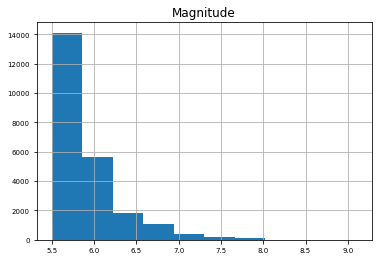

In [11]:
df.hist("Magnitude", grid=True, xlabelsize=7, ylabelsize=7)
plt.show()

<font color=red>O grafico se mostra mais deslocado pra esquerda o que nos faz pensar que quanto maior a magnitude menos ocorrência temos.</font>

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [17]:
expon.fit(df.Magnitude)

(5.4999999996710809, 0.38254864885090978)

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

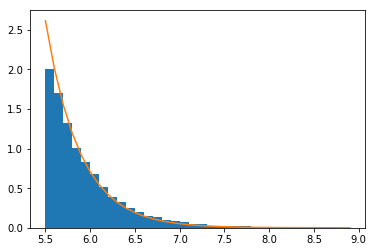

In [56]:
i = np.arange(5.5,9,0.1)
plt.hist(df.Magnitude, normed=1, histtype='stepfilled', alpha=1, bins=i)
plt.plot(i,expon.pdf(i, loc = 5.4999999996710809, scale=0.38254864885090978))
plt.show()

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [58]:
print("Tabela Normalizada")
hemitype = pd.crosstab(df.Hemisferio,df.Type,margins=True,rownames=['Hemisfério'],normalize = True, colnames=['Type'])*100
hemitype

Tabela Normalizada


Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisfério,,,,,
Norte,44.716385,0.008543,0.627883,0.000000,45.352811
Sul,54.514779,0.008543,0.119597,0.004271,54.647189
All,99.231164,0.017085,0.747480,0.004271,100.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

<font color=blue>P(T|N) = P(T ∩ N)/P(N)</font>
<br></br>
<font color=red>A probabilidade de ocorrer Earthquake no hemisfério Norte é: 44.7164%.</font>

Explique o seu raciocínio

<font color=red> Meu raciocinio foi de achar a probabililidade de um Terremoto ser no norte sendo que ele já ocorreu.</font>     

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

<font color=blue>P(NC|N) = P(NC ∩ N)/P(N)</font>
<br></br>
<font color=red>A probabilidade é de:1.38447901783%</font>

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

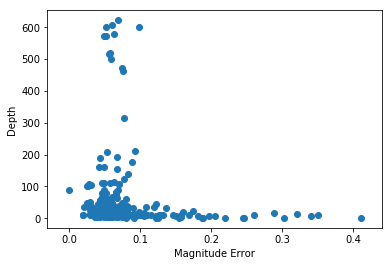

In [63]:
plt.scatter(df["Magnitude Error"],df.Depth)
plt.xlabel("Magnitude Error")
plt.ylabel("Depth")
plt.show()

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [64]:
df.Depth.corr(df['Magnitude Error'])

-0.076918438923387192

Explique o que significa o valor da correlação calculada acima? 

<font color=red>O gráfico mostra os pontos não muito dispersos e tendendo ao zero mostrando que o valor da correlacão esta próximo disso, vemos alguns Outliers, porém em sua maioria os pontos tendem a 0. Correlação mostra relação linear entre as variáveis, se esta tendendo a zero mostra que não tem relação linear entre essas variáveis.</font>

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [74]:
LatLong = df.loc[:,["Latitude","Longitude"]]
LatLong.describe()

,Latitude,Longitude
count,23412.000000,23412.000000
mean,1.679033,39.639961
std,30.113183,125.511959
min,-77.080000,-179.997000
25%,-18.653000,-76.349750
50%,-3.568500,103.982000
75%,26.190750,145.026250
max,86.005000,179.998000


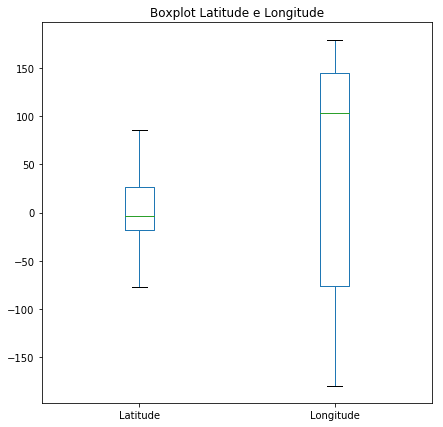

In [79]:
LatLong.plot(kind='box', figsize=(7,7), title="Boxplot Latitude e Longitude")
plt.show()

<font color=red> Vemos uma Quantidade maior de abalos ocorrendo na região Norte que na região Sul, e esse abalos se mostram mais recorrentes em longitudes entre 0 e 100 graus.</font>

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [85]:
MBN=df[(df['Magnitude Type'] == "MB") & (df['Type'] == "Nuclear Explosion")]
Res=(MBN.Hemisferio.value_counts(normalize=True, sort=False))
Res

Norte    0.828221
Sul      0.171779
Name: Hemisferio, dtype: float64

<font color=red> Após conferir os resultados vemos que é mais provavel que o abalo tenha sido no Norte.</font>